In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score

 
 

In [2]:
titanicdf =sns.load_dataset('titanic')
titanicdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
filteredDF = titanicdf.drop_duplicates()
filteredDF = filteredDF.drop(columns = ['embark_town','deck','age','embarked','who','class', 'alive'])

In [4]:
filteredDF.isna().sum()

#filteredDF['embarked'] = filteredDF['embarked'].fillna(filteredDF['embarked'].mode())
filteredDF

,survived,pclass,sex,parch,fare,alive,alone
0,0,3,male,0,7.2500,no,False
1,1,1,female,0,71.2833,yes,False
2,1,3,female,0,7.9250,yes,True
3,1,1,female,0,53.1000,yes,False
4,0,3,male,0,8.0500,no,True
...,...,...,...,...,...,...,...
885,0,3,female,5,29.1250,no,False
887,1,1,female,0,30.0000,yes,True
888,0,3,female,2,23.4500,no,False
889,1,1,male,0,30.0000,yes,True


In [14]:
filteredDF = filteredDF.replace(to_replace=['male','female'], value= ['1','0'])

#filteredDF['embarked'] = filteredDF['embarked'].replace(to_replace= 'nan' , value= filteredDF['embarked'].mode())
#filteredDF['embarked'].unique()
filteredDF.isna().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
adult_male    0
alone         0
dtype: int64

In [15]:
Y = filteredDF['survived']
X = filteredDF.drop(columns=['survived'])

In [16]:
X.head()

,pclass,sex,sibsp,parch,fare,adult_male,alone
0,3,1,1,0,7.2500,True,False
1,1,0,1,0,71.2833,False,False
2,3,0,0,0,7.9250,False,True
3,1,0,1,0,53.1000,False,False
4,3,1,0,0,8.0500,True,True


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=16)


In [18]:
logreg = LogisticRegression(random_state=16,max_iter=200)

logreg.fit(X_train,Y_train)

Y_pred = logreg.predict(X_test)

In [19]:
cnf_matrix = metrics.confusion_matrix(Y_test,Y_pred)
cnf_matrix

array([[91, 15],
       [35, 55]])

In [20]:
Y_prob = logreg.predict_proba(X_test)[:,1]
Y_pred = np.where(Y_pred == 'yes', 1,0)

In [24]:
fpr , tpr, _ = roc_curve(Y_test,Y_prob)
auc = metrics.auc(fpr, tpr)

In [25]:
print(auc)

0.7969077568134171


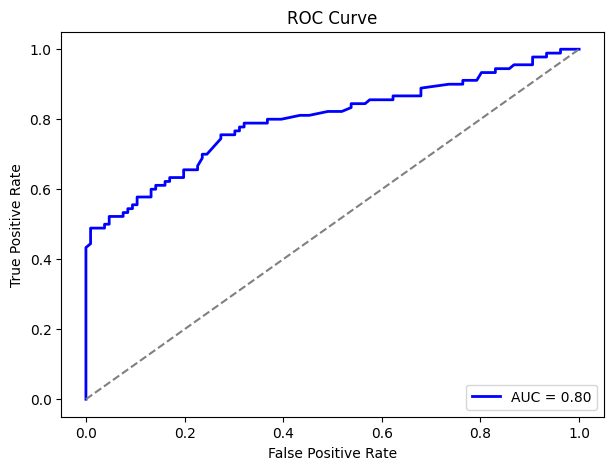

In [27]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()